In [1]:
%matplotlib inline
import pandas as pd

# pmf

## 정의

pmf: probability mass function, 확률 질량 함수

분포를 표현하는 또다른 방식은 확률 질량 함수(probability mass function) (PMF)로 각 값을 확률로 매핑한다. 확률(probability)은 표본 크기 n의 일부로서 표현되는 빈도다. 빈도에서 확률을 얻기 위해서, n으로 나누는데 이를 정규화(normalization)라고 부른다.

## 예시

정육면체 주사위의 여섯 면 중 3개의 면에는 눈금이 1개, 2개의 면에는 눈금이 2개, 1개의 면에는 눈금이 3개 그려져 있다.

In [2]:
number = pd.Series([1, 1, 1, 2, 2, 3])
number

0    1
1    1
2    1
3    2
4    2
5    3
dtype: int64

1. 주사위를 굴렸을 때 1이 나올 확률: PMF(1) = 1/2
1. 주사위를 굴렸을 때 2가 나올 확률: PMF(2) = 1/3
1. 주사위를 굴렸을 때 3이 나올 확률: PMF(3) = 1/6

In [3]:
pmf = number.value_counts().sort_index()  # 각 값들의 빈도 수 계산
pmf /= pmf.sum()  # 전체 수로 나누어 확률 계산 (normalization)
pmf

1    0.500000
2    0.333333
3    0.166667
dtype: float64

In [4]:
print(pmf[1], pmf[2], pmf[3])

(0.5, 0.33333333333333331, 0.16666666666666666)


## 성질

모든 확률을 다 더하면 1이다.

In [5]:
pmf.sum()

0.99999999999999989

## 코드

### 기본 연산

In [6]:
print('# index 구하기')
print(pmf.index)

print('# 확률 구하기')
print(pmf.values)

print('# 모든 확률 더하기')
print(pmf.sum())

# index 구하기
Int64Index([1, 2, 3], dtype='int64')
# 확률 구하기
[ 0.5         0.33333333  0.16666667]
# 모든 확률 더하기
1.0


### Mean 구하기

$\bar{x}$: mean (눈금의 기대값)

$x_i$: 눈금의 수

$PMF(x_i)$: 눈금이 $x_i$개 나올 확률

$$\bar{x} = \sum_i PMF(x_i) x_i$$

In [7]:
pmf.mul(pmf.index).sum()

1.6666666666666665

In [8]:
number.mean()  # 원 데이터로 구한 mean

1.6666666666666667

### Variance 구하기

$S^2$: Variance

$\bar{x}$: mean (눈금의 기대값)

$x_i$: 눈금의 수

$PMF(x_i)$: 눈금이 $x_i$개 나올 확률

$$S^2 = \sum_i PMF(x_i) (x_i − \bar{x})^2$$

In [9]:
pmf.mul((pmf.index - pmf.mul(pmf.index).sum()) * (pmf.index - pmf.mul(pmf.index).sum())).sum()

0.55555555555555558

In [10]:
number.values.var()  # 원 데이터로 구한 mean

0.55555555555555558

### 시각화

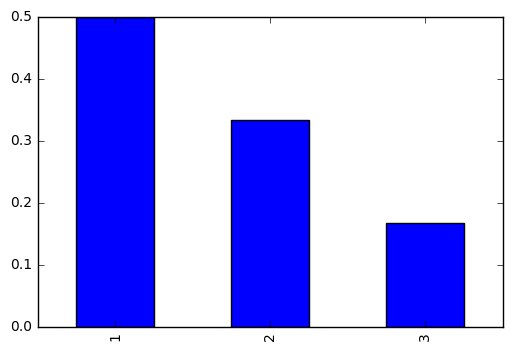

In [11]:
pmf.plot.bar()

##  학급 크기 패러독스 (class size paradox)

진도를 더 나가기 전에, Pmf 객체를 가지고 할 수 있는 한가지 계산(computation)을 시연하고자 한다; 다음 예제를 "학급 크기 패러독스(class size paradox)" 라고 명명한다.

많은 미국 대학에서, 학생대교수 비율은 약 10:1이 된다. 하지만 종종 학생들이 평균 학급크기가 10보다 큰 것을 발견하고 놀라곤 한다. 불일치에 대한 두가지 이유가 있다.

학생들이 학기당 일반적으로 4–5 과목을 수강하지만, 교수는 1 혹은 2 교과목만 가르친다.  
적은 학급 수업을 즐기는 학생 숫자는 적지만, 큰 학급 수업에 학생수는 많다.  
첫 이유는 명확하지만, 두번째 이유는 다소 모호하다. 사례를 살펴보자. 대학에서 다음과 같은 학급 크기 분포로 한 학기에 65 교과목을 개설한다고 가정하자.

```
 size      count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2
```

만약 학교 총장에게 평균 학급크기를 물어본다면, 총장은 PMF를 생성하고, 평균을 계산하고 나서 학급 평균 크기가 23.7이라고 보고한다. 다음에 코드가 있다.

In [12]:
class_size = pd.Series({7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}, name='class_size')
class_size

7      8
12     8
17    14
22     4
27     6
32    12
37     8
42     3
47     2
Name: class_size, dtype: int64

In [13]:
pmf = class_size / class_size.sum()
pmf

7     0.123077
12    0.123077
17    0.215385
22    0.061538
27    0.092308
32    0.184615
37    0.123077
42    0.046154
47    0.030769
Name: class_size, dtype: float64

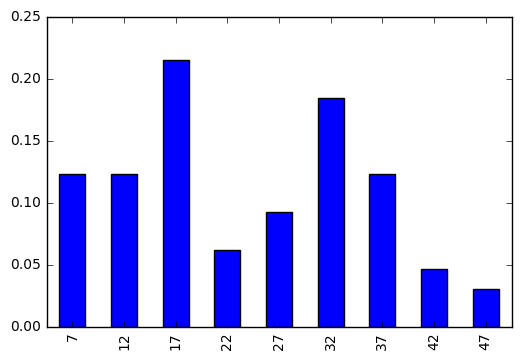

In [14]:
pmf.plot.bar()

하지만, 학생집단을 대상으로 수업에 학생이 있는지 물어보고, 평균을 계산한다면, 평균 학급크기가 더 크다고 생각할 것이다. 얼마나 더 큰지 살펴보자.

먼저, 학생들이 관측한 분포를 계산하자. 여기서 각 학급 크기와 연관된 확률은 학급에 있는 학생으로 “편의(bias)”가 있다.

In [15]:
biased = pmf.mul(pmf.index)
biased /= biased.sum()
biased

7     0.036364
12    0.062338
17    0.154545
22    0.057143
27    0.105195
32    0.249351
37    0.192208
42    0.081818
47    0.061039
Name: class_size, dtype: float64

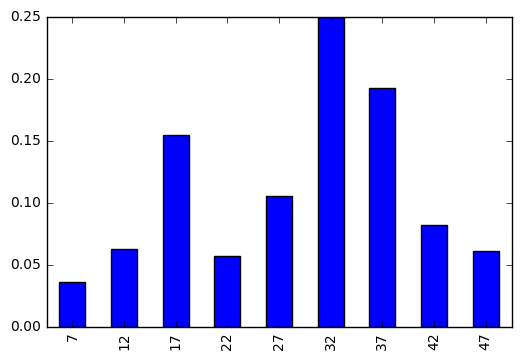

In [16]:
biased.plot.bar()

각 학급 크기 x마다, 확률값에 학급 크기를 관측한 학생수 x를 곱한다. 결과는 편의분포를 나타내는 새로운 Pmf가 된다.  
이제 실제와 관측된 분포 모두를 플롯 그래프로 그릴 수 있다.



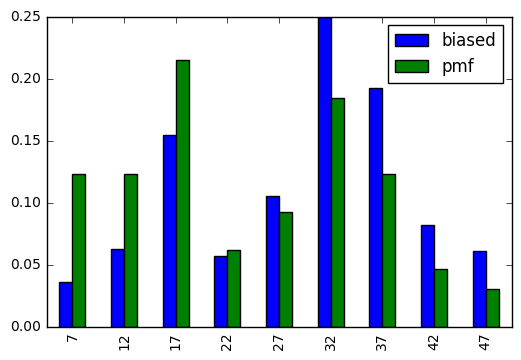

In [17]:
pd.DataFrame({'pmf': pmf, 'biased': biased}).plot.bar()

In [18]:
print(pmf.mul(pmf.index).sum(), biased.mul(biased.index).sum())  # pmf mean and biased mean
print(biased.mul(biased.index).sum() / pmf.mul(pmf.index).sum() - 1)  # Diff ratio

(23.692307692307693, 29.123376623376622)
0.229233428909


편의된 분포에서 작은 학급은 더 작고, 큰 학급은 더 많다. 편의된 분포 평균은 29.1로 실제 평균값보다 약 25%더 많다.  
이 연산을 거꾸로 하는 것도 또한 가능하다. 대학 학급 크기 분포를 알고자 한다고 가정하자. 하지만, 대학 총장으로부터 신뢰성 있는 자료를 얻을 수는 없다. 대안은 무작위 학생 표본을 골라 학급에 학생수가 얼마인지 설문하는 것이다.

결과는 앞선 살펴봤던 이유로 편의가 있을지 모르지만, 이것을 사용해서 실제 분포를 추정한다. 다음에 Pmf 불편의(unbiased) 함수가 있다.

In [19]:
unbiased = biased.div(biased.index)
unbiased /= unbiased.sum()
unbiased

7     0.123077
12    0.123077
17    0.215385
22    0.061538
27    0.092308
32    0.184615
37    0.123077
42    0.046154
47    0.030769
Name: class_size, dtype: float64

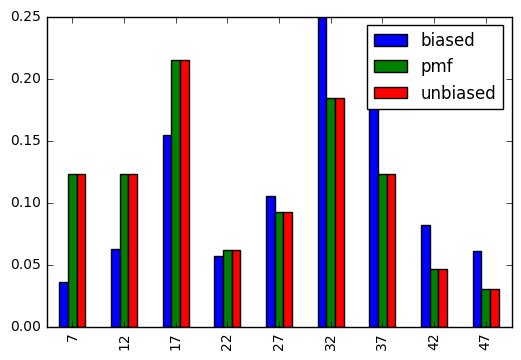

In [20]:
pd.DataFrame({'pmf': pmf, 'biased': biased, 'unbiased': unbiased}).plot.bar()

BiasPmf 함수와 비슷하다; 유일한 차이점은 곱하는 대신에 각 확률값을 x로 나눈다는 것이다.